# MNIST: Simple Deep Neural Network for Image Classification

This tutorial is part of the [EFI Data Analytics for Physics](https://indico.cern.ch/event/676637/) workshop. It is meant for the beginner HEP undergraduate or graduate student (or postdoc/faculty) who wants to get started implementing a simple [Convolutional Neural Network (ConvNet)](https://en.wikipedia.org/wiki/Convolutional_neural_network) in [Python](https://docs.python.org/3/tutorial/) with [Keras](https://keras.io). The task is to classify images from the ''[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)'' dataset, which shares the same image size (28x28 pixels) and split between training and testing datasets as the original [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which is often used as the "Hello World" example for object recognition with deep learning. The tutorial was develped by Ben Nachman (UC Berkeley) and Joakim Olsson (University of Chicago), with inspiration from tutorials online (such as [this]((https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/) excellent tutorial using MNIST for handwritten digit recognition).

## Goals
In this tutorial you will learn:
- How to load a datasets into Keras from an HDF5 file.
- How to implement a simple multi-layer perceptron neural network in Keras.
- How to implement and evaluate a simple Convolutional Neural Network (ConvNet).
- How to implement a close to state-of-the-art deep learning model in Keras.
- How to modify the structure and function of models in Keras. 

## Exercises

### 1.) Run through the notebook with the fashion-MNIST dataset
Like the previous tutorial, we recommend your first go through the tutorial carefully first, don't hesitate to ask us question of something is not clear!

#### 1a) What is the performance of each neural network model? 
#### 1b) Which model  has the best accuracy on the test dataset? 
#### 1c) What is the difference between accuracy and loss?

### 2. Switch to the MNIST dataset of handwritten digits and rerun the training 
By changing the ```"do_andwritten_digit_mnist = True"``` boolean below.

#### 2a) Switch to the MNIST dataset and rerun the notebook
#### 2b) How does the accuracy and loss of the training and test datasets compare with the "fashion-MNIST" dataset?


### 3) Modify the number of training samples
Try reducing the number of training samples (and test) by 1-2 orders of magnitude. How does that change the performance for each model?

### 4) Modify the neural networks
    
#### 4a). Try tweaking the feed-forward network
Suggestions: What happens if you increase the number neurons in the hidden layer? What happens if you increase/decrease the number of training epochs? What happens if you vary the batch size? What happens if you change the [activation function](https://keras.io/activations/) (in particular try switching from 'sigmoind' to 'linear')? What happens if you add additional layers?

#### 4b). Try tweaking the simple Convolutional Neural Network 
- What does Conv2D do? Try to modify it's parameters (filter, kernel-size, stride, etc.). (See: [https://keras.io/layers/convolutional/](https://keras.io/layers/convolutional/))
- What is MaxPooling2D Try to modify it's parameters (See: [https://keras.io/layers/pooling/#maxpooling2d](https://keras.io/layers/pooling/#maxpooling2d))
- Etc...

#### 4c) Try tweaking the more complicated Deep Neural Network
- Try training on more epochs. 
- Try to modify the structure of the network, adding additional layers etc. 
- Google something like "fashion-MNIST Kaggle" etc. for tons of example networks that various groups.


## Loading the Fashion-MNIST dataset in Keras

We will work with the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Each image is a 28 by 28 pixel square grayscale image (784 pixels in total), associated with a label from 10 classes. The dataset is split into 60,000 images used for training and 10,000 examples for testing. 

Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's begin by loading the dataset (if you want to try the standard "Handwritting digit MNIST" instead of Fashion MNIST, just set: ```do_handwritten_mnist=True```).

First here's a function to load the data from HDF5.

In [1]:
# Function to import the dataset 
# (if 'do_handwritten_digit_mnist = True' the standard handwritten digit MNIST dataset will be used instead of the fashion dataset)
import h5py
def import_data(do_handwritten_digit_mnist = False):
    
    # Load the data from hdf5 files
    if do_handwritten_digit_mnist:
        h5_file_readonly = h5py.File('data/handwritten-mnist.h5','r')
    else:
        h5_file_readonly = h5py.File('data/fashion-mnist.h5','r')
    X_train = h5_file_readonly['X_train'][:]
    X_test = h5_file_readonly['X_test'][:]
    y_train = h5_file_readonly['y_train'][:]
    y_test = h5_file_readonly['y_test'][:]
    h5_file_readonly.close()
    return X_train, X_test, y_train, y_test

Next, let's actually import the data.

In [2]:
# Set to 'True' if you want to use the handwritten digit dataset instead
do_handwritten_digit_mnist = False
X_train, X_test, y_train, y_test = import_data(do_handwritten_digit_mnist)

To see the shape of numpy arrays, you can do the following:

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We can quickly plot a few examples of the images from the dataset to get an idea of what they look like (each image is an array of 28x28 pixels). ```matplotlib.pyplot.imshow``` is useful for plotting arrays.

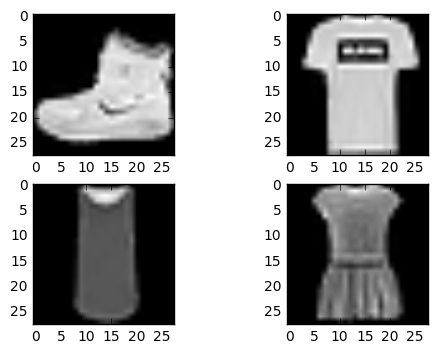

In [4]:
# TODO: will be explanined on tuesday
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## 1. Simple feed-forward Neural Network

Before we get to the more complex convolutional neural network, let's start with a simple multi-layer perceptron model as a baseline. 

Initialize a random number generator, which is useful if you want to reproduce the results later.

In [5]:
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Load the dataset again, just to make sure we start with a clean slate.

In [6]:
# Set to 'True' if you want to use the handwritten digit dataset instead
do_handwritten_digit_mnist = False
X_train, X_test, y_train, y_test = import_data(do_handwritten_digit_mnist)

When training this simple Neural Network we will first flatten the 28x28 2D images into a vector of 784 (28x28) 1D-array for each image. This is because when training a simple Neural Network there is no 2D shape information in the inputs.

Let's perform some numpy array tricks. 

In [7]:
print("Before flattening:")
print("X_train.shape {}".format(X_train.shape))
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] # 28x28
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print("After flattening:")
print("X_train.shape {}".format(X_train.shape))

Before flattening:
X_train.shape (60000, 28, 28)
After flattening:
X_train.shape (60000, 784)


Before training, input features are often normalized to within the range [0, 1].

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

The training labels (i.e. the 'y' values) are often converted into what's called "[one-hot](https://en.wikipedia.org/wiki/One-hot)" encoding. All this means is that instead of encoding the labels with scalar values between 0-9 (as in the table above), each y-label is represented by a vector of length 10 where the ith entry, corresponding to the scalar value of y, is 1 (hot) and the rest 0. 

Ex. 5 - sandal would look like: $[0 0 0 0 0 1 0 0 0 0]^T$



In [9]:
from keras.utils import np_utils
# Ex. say we have the following labels
yy = np.array([0, 1, 2, 3, 4 , 5, 6 ,7 ,8 ,9], np.float32)
print('yy',yy)
print('yy.shape',yy.shape)
yy_onehot = np_utils.to_categorical(yy)
print('yy_onehot',yy_onehot)
print('yy_onehot.shape',yy_onehot.shape)

Using TensorFlow backend.


('yy', array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32))
('yy.shape', (10,))
('yy_onehot', array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]))
('yy_onehot.shape', (10, 10))


Let's now do the same thing for our actual dataset.

In [10]:
# one hot encode outputs
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
num_classes = y_test_onehot.shape[1]
print("y_train.shape: ",y_train.shape)
print("y_train_onehot.shape: ",y_train_onehot.shape)

('y_train.shape: ', (60000,))
('y_train_onehot.shape: ', (60000, 10))


Alright, so let's start doing some machine learning. Again, you are strongly encouraged to go and read the [Keras documentation](https://keras.io).

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

We compile our model and choose ['binary_crossentropy']('https://keras.io/losses/') as our loss function and ['ADAM' (adaptive moment estimation)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) as the optimizer (an extension of stochastic gradient descent).

In [11]:
# Import the Sequential model
from keras.models import Sequential
# Dense is just your the regular densely-connected NN layer
from keras.layers import Dense

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Build and show the model architecuture.

In [18]:
# build the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


We then train our model in the training data. Keras automatically runs validation on the test data.

You can experiment with the number of 'epochs' the 'batch size':
- one epoch = One forward pass and one backward pass of all the training examples.
- batch size = The number of training examples in one forward/backward pass. Tthe higher the batch size, the more memory space you'll need.

In [21]:
# Fit (train) the model
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2111 - acc: 0.9220 - val_loss: 0.3154 - val_acc: 0.8926
Epoch 2/10
3s - loss: 0.2049 - acc: 0.9238 - val_loss: 0.3109 - val_acc: 0.8940
Epoch 3/10
3s - loss: 0.1955 - acc: 0.9279 - val_loss: 0.3028 - val_acc: 0.8955
Epoch 4/10
3s - loss: 0.1889 - acc: 0.9302 - val_loss: 0.3023 - val_acc: 0.8955
Epoch 5/10
3s - loss: 0.1815 - acc: 0.9334 - val_loss: 0.3167 - val_acc: 0.8911
Epoch 6/10
3s - loss: 0.1734 - acc: 0.9359 - val_loss: 0.3340 - val_acc: 0.8929
Epoch 7/10
3s - loss: 0.1697 - acc: 0.9379 - val_loss: 0.3148 - val_acc: 0.8932
Epoch 8/10
3s - loss: 0.1613 - acc: 0.9413 - val_loss: 0.3176 - val_acc: 0.8953
Epoch 9/10
3s - loss: 0.1559 - acc: 0.9426 - val_loss: 0.3118 - val_acc: 0.8971
Epoch 10/10
3s - loss: 0.1516 - acc: 0.9443 - val_loss: 0.3258 - val_acc: 0.8941
Baseline Error: 10.59%


The baseline error for this simple multi-layer perceptron neural net should be around 11%. 

You can plot the accuracy and loss vs. epoch.

['acc', 'loss', 'val_acc', 'val_loss']


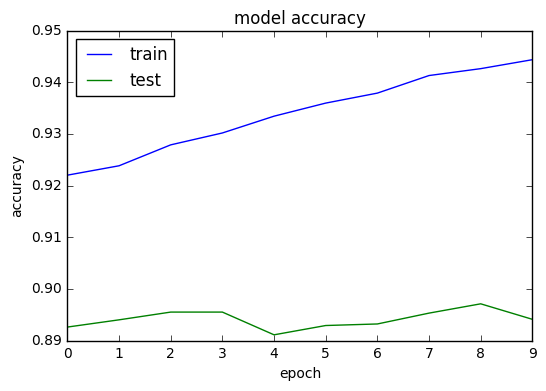

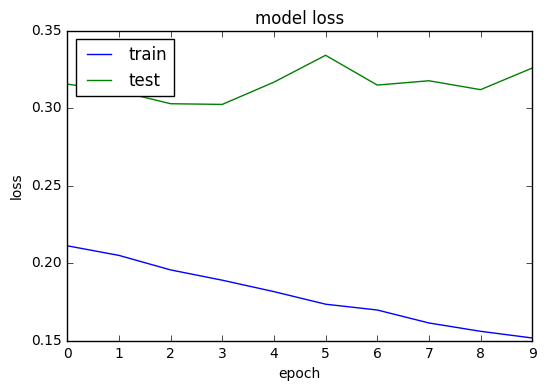

In [24]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Simple Convolutional Neural Network

In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

We start by importing the classes and functions needed.

In [25]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [34]:
# Set to 'True' if you want to use the handwritten digit dataset instead
do_handwritten_digit_mnist = False
X_train, X_test, y_train, y_test = import_data(do_handwritten_digit_mnist)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [35]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Next we define our neural network model.

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state of the art results. Below summarizes the network architecture.

The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
Next a fully connected layer with 128 neurons and rectifier activation function.
Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [30]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

We evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over 10 epochs with a batch size of 200.

In [31]:
# build the model
model = baseline_model()
# Print a summary of the model structure
model.summary()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
76s - loss: 0.5203 - acc: 0.8178 - val_loss: 0.3898 - val_acc: 0.8633
Epoch 2/10
77s - loss: 0.3505 - acc: 0.8766 - val_loss: 0.3418 - val_acc: 0.8771
Epoch 3/10
76s - loss: 0.3115 - acc: 0.8885 - val_loss: 0.3138 - val_acc: 0.8866
Epoch 4/10
73s - loss: 0.2824 - acc: 0.8986 - val_loss: 0.2885 - val_acc: 0.8963
Epoch 5/10
74s - loss: 0.2617 - acc: 0.9059 - val_loss: 0.2775 - val_acc: 0.9013
Epoch 6/10
75s - loss: 0.2473 - acc: 0.9102 - val_loss: 0.2755 - val_acc: 0.9017
Epoch 7/10
75s - loss: 0.2322 - acc: 0.9155 - val_loss: 0.2620 - val_acc: 0.9036
Epoch 8/10
72s - loss: 0.2195 - acc: 0.9191 - val_loss: 0.2520 - val_acc: 0.9092
Epoch 9/10
71s - loss: 0.2087 - acc: 0.9234 - val_loss: 0.2488 - val_acc: 0.9105
Epoch 10/10
71s - loss: 0.1990 - acc: 0.9261 - val_loss: 0.2462 - val_acc: 0.9133
CNN Error: 8.67%


The error for this simple convolutional neural net should be about 8.5% (after 10 epochs).

['acc', 'loss', 'val_acc', 'val_loss']


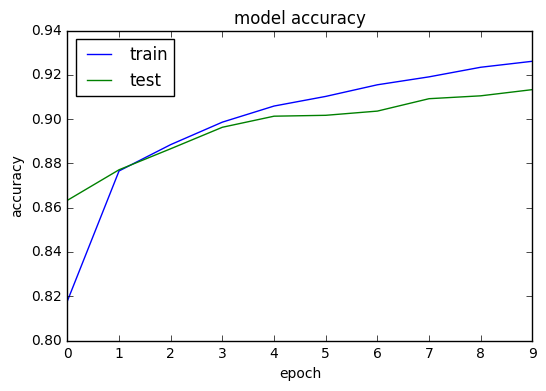

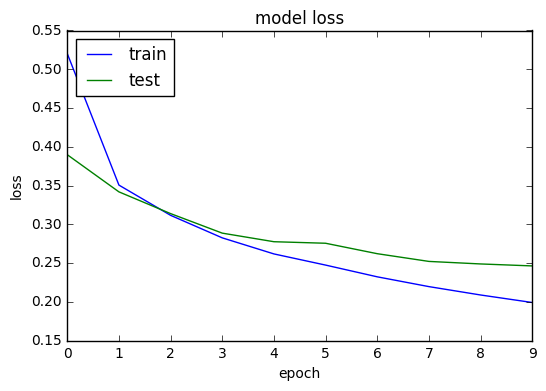

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Larger Convolutional Neural Network

Finally, let's implement closer to the state of the art results.

In [36]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the dataset
do_handwritten_digit_mnist = False
X_train, X_test, y_train, y_test = import_data(do_handwritten_digit_mnist)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

This time we define a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5×5.
2. Pooling layer taking the max over 2*2 patches.
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [37]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Training: Like the previous two experiments, the model is fit over 10 epochs with a batch size of 200.

In [38]:
# build the model
model = larger_model()
# Print a summary of the model structure
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 84s - loss: 0.7496 - acc: 0.7260 - val_loss: 0.4963 - val_acc: 0.8241

It is often very useful to save a partly trained model. This is easy in Keras.

In [ ]:
# Save partly trained model
model.save('partly_trained.h5')

To the reload the model and continue training you can do:

In [ ]:
# Load partly trained model
from keras.models import load_model
model = load_model('partly_trained.h5')

# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

The model takes about 100 seconds to run per epoch.

Congratulations, you are now done with the default tutorial. We strongly encourage you to tweak parameters and modify in order to improve the model.